In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import seaborn as sns
import json
import torch
import pickle

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DeJavu Serif"


In [9]:
df_all = pd.DataFrame()

In [10]:
# perp_folders = ["../output/5050/"]
perp_folders = ["../output/modified_graph/"]

In [11]:

for perp_folder in perp_folders:
    files = os.listdir(perp_folder)
    files = [os.path.join(perp_folder, f) for f in files] # add path to each file
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)

    # print(files)
    
    for file in files:        
        if "opposite" in file or "emb" in file or "predictions" in file or "proportions" in file:
            continue 
        
        # if "english" not in file:
        #     continue 
                
        if ".log" in file:
            continue
        print(file)
        method = file.split("/")[-1]
        
        runs = os.listdir(file)
        
        for run in runs:
            if "proportions" in run:
                continue 
            seed = int(run.split("seed_")[-1].split("_")[0])
            checkpoint = int(run.split("-")[-1].split(".")[0])
            if len(df_all) != 0:
                if len(df_all.loc[(df_all.method==method) & (df_all.seed == seed) & (df_all.index==checkpoint)]) != 0:
                    continue 
                
            path = os.path.join(file, run)
            print(path)
                
            loss_dict = pd.read_pickle(path)
        
        
            df = pd.DataFrame([{"skill": k, "loss": [values.numpy() if torch.is_tensor(values) else values for values in v]} for k, v in loss_dict.items()])
            df["perplexity"] = pd.Series([np.exp(l) for l in df["loss"].values])
            df["average_loss"] = pd.Series([sum(l)/len(l) for l in df["loss"].values])
            df["average_perplexity"] = pd.Series([sum(p)/len(p) for p in df["perplexity"].values])
            df["method"] = method
            df["seed"] = seed
            df["checkpoint"] = checkpoint


            df.set_index("checkpoint", inplace=True)


            df_all = pd.concat([df_all, df])
    


../output/modified_graph/skillit_argmax_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints
../output/modified_graph/skillit_argmax_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints/seed_3_checkpoint-0.pkl
../output/modified_graph/skillit_argmax_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints/seed_1_checkpoint-0.pkl


../output/modified_graph/skillit_argmax_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints/seed_2_checkpoint-100.pkl
../output/modified_graph/skillit_argmax_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints/seed_0_checkpoint-500.pkl
../output/modified_graph/skillit_argmax_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints/seed_3_checkpoint-600.pkl
../output/modified_graph/skillit_argmax_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints/seed_0_checkpoint-0.pkl
../output/modified_graph/skillit_argmax_ni_xlingual_600_mixture_question_answering_english_english

In [12]:
def aggregate_skill(x, ppl=True):
    if ppl:
        total_ppl = x["perplexity"].apply(lambda x: sum(x)).sum()
        count_ppl = x["perplexity"].apply(lambda x: len(x)).sum()
        metric_name = "skill_perplexity"
        metric = total_ppl/count_ppl
    else:
        total_loss = x["loss"].apply(lambda x: sum(x)).sum()
        count_loss = x["loss"].apply(lambda x: len(x)).sum()
        metric_name = "skill_loss"
        metric = total_loss/count_loss

    names = {metric_name: metric}
    
    return pd.Series(names, index=[metric_name])



In [13]:
sorted(df_all.method.unique())

['5050_spanish_qg',
 'loss_factor_2_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints',
 'loss_factor_4_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints',
 'skillit_all_skills_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_1111_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints',
 'skillit_argmax',
 'skillit_argmax_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints',
 'skillit_large_eta_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_10.0_lookback_3_checkpoints',
 'skillit_no_exp_ni_xlingual_600_mixture_question_answering_

[3 4 0 2 1]


/tmp/ipykernel_3341399/2686915744.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill"]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()


checkpoint
600    2.866657
600    2.256503
600    2.985267
600    2.298645
Name: skill_loss, dtype: float64
[3 4 0 2 1]


/tmp/ipykernel_3341399/2686915744.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill"]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()


checkpoint
600    2.670884
600    2.336490
600    2.831890
600    2.361193
Name: skill_loss, dtype: float64
[3 4 0 2 1]


/tmp/ipykernel_3341399/2686915744.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill"]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()


checkpoint
600    3.043158
600    2.222464
600    3.222234
600    2.278728
Name: skill_loss, dtype: float64
[3 4 0 2 1]


/tmp/ipykernel_3341399/2686915744.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill"]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()


checkpoint
600    3.064094
600    2.232297
600    3.243260
600    2.293301
Name: skill_loss, dtype: float64
[3 4 0 2 1]
checkpoint
600    2.716817
600    2.289134
600    2.873718
600    2.327511
Name: skill_loss, dtype: float64


/tmp/ipykernel_3341399/2686915744.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill"]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()


Text(0.5, 1.0, 'Targeted learning of Spanish question generation - Spanish QG')

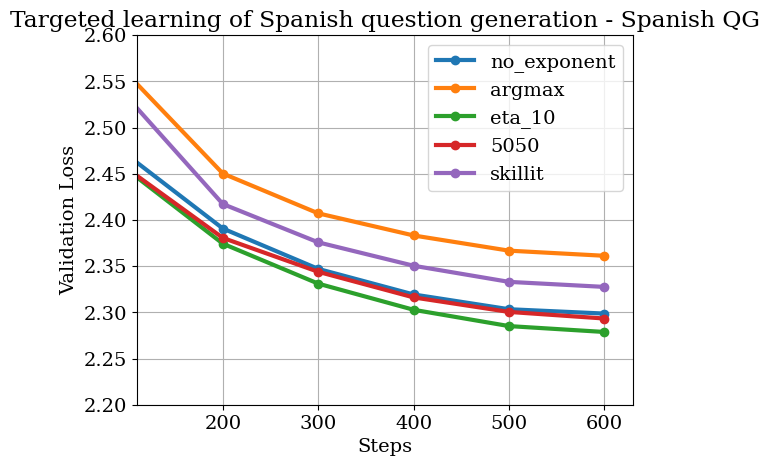

In [14]:


methods = [
    'skillit_no_exp_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints',
    # 'loss_factor_2_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints',
    # 'loss_factor_4_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints',
    'skillit_argmax',
    'skillit_large_eta_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_10.0_lookback_3_checkpoints',
    '5050_spanish_qg',
    'skillit_spanish_qg'
]

labels = [
    # 'loss_factor_2',
    'no_exponent',
    'argmax',
    'eta_10',
    # 'loss_factor_4',
    '5050',
    'skillit'
]
# labels = ["0_50_0_50", "50_50 QAQG"]
# labels = ["Skill-it", "Real + Synthetic Augmentation", "Target Only"]

# methods = [
#     "real",
    # "synthetic_v2",
    # "synthetic_v3",
    # "synthetic_v4",
    # "synthetic_v4_05_split",
    # "synthetic_v4_075_split",
    # "synthetic_v4_09_split",
    # "target_only",

    # "ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints copy",
    # "english_v3",
    # "ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints",
    # "ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_0001_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints",
# ]
# labels = [
#     "Skill-It", 
#     # "Synthetic v1", 
#     # "Synthetic v2", 
#     "Synthetic v4", 
#     "Synthetic v4 (0.5 split)",
#     "Synthetic v4 (0.75 split)",
#     "Synthetic v4 (0.9 split)",
#     "Target Baseline"
# ]

assert len(methods) == len(labels)
plt.figure()
seeds=[0, 1, 2, 3, 4]


for i, method in enumerate(methods):
    
    df_shuffled = df_all.loc[df_all.method == method].sort_index()
    print(df_shuffled.seed.unique())
    df_shuffled = df_shuffled.loc[df_shuffled.seed.isin(seeds)]
    df_overall = df_shuffled.groupby([df_shuffled.index]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()
    df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill"]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()
    df_shuffled.set_index("checkpoint", inplace=True)
    df_overall.set_index("checkpoint", inplace=True)
    df_overall.drop([0], inplace=True)

    df_shuffled.loc[df_shuffled.skill == "question_generation_spanish_spanish"].skill_loss.plot(marker="o", label=labels[i], lw=3)
    print(df_shuffled.loc[df_shuffled.index == df_shuffled.index.max()].skill_loss)



plt.xlim(110, )
plt.ylim(2.2, 2.6)
plt.xlabel("Steps")
plt.ylabel("Validation Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title("Targeted learning of Spanish question generation - Spanish QG")


[3 4 0 2 1]


/tmp/ipykernel_2578614/213241440.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill"]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()


checkpoint
600    2.698454
600    2.307512
600    2.855889
600    2.312167
Name: skill_loss, dtype: float64
[3 4 0 2 1]
checkpoint
600    2.696527
600    2.306845
600    2.854936
600    2.312414
Name: skill_loss, dtype: float64


/tmp/ipykernel_2578614/213241440.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill"]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()


Text(0.5, 1.0, 'Targeted learning of Spanish question generation - Spanish QG')

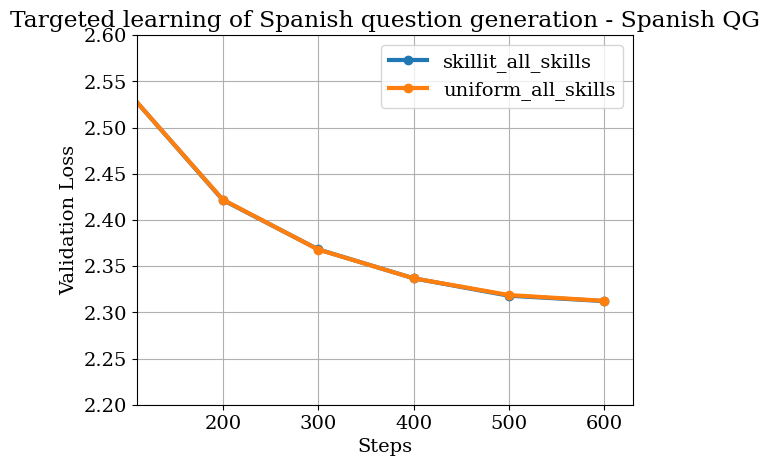

In [31]:
methods = [
    'skillit_all_skills_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_1111_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints',
     'uniform_all_skills_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_1111_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints',
]

labels = [
    'skillit_all_skills',
    'uniform_all_skills'
]
assert len(methods) == len(labels)
plt.figure()
seeds=[0, 1, 2, 3, 4]


for i, method in enumerate(methods):
    
    df_shuffled = df_all.loc[df_all.method == method].sort_index()
    print(df_shuffled.seed.unique())
    df_shuffled = df_shuffled.loc[df_shuffled.seed.isin(seeds)]
    df_overall = df_shuffled.groupby([df_shuffled.index]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()
    df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill"]).apply(lambda x: aggregate_skill(x, ppl=False)).reset_index()
    df_shuffled.set_index("checkpoint", inplace=True)
    df_overall.set_index("checkpoint", inplace=True)
    df_overall.drop([0], inplace=True)

    df_shuffled.loc[df_shuffled.skill == "question_generation_spanish_spanish"].skill_loss.plot(marker="o", label=labels[i], lw=3)
    print(df_shuffled.loc[df_shuffled.index == df_shuffled.index.max()].skill_loss)



plt.xlim(110, )
plt.ylim(2.2, 2.6)
plt.xlabel("Steps")
plt.ylabel("Validation Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title("Targeted learning of Spanish question generation - Spanish QG")

In [29]:
df_all[df_all['method'] ==  'skillit_all_skills_ni_xlingual_600_mixture_question_answering_english_english_question_answer_targetmask_1111_mean_spanish_qg_normalized_greedy_100_eta_0.8_lookback_3_checkpoints']

,skill,loss,perplexity,average_loss,average_perplexity,method,seed
checkpoint,,,,,,,
0,question_answering_english_english,"[2.7291558, 2.3581922, 2.7358828, 2.9685812, 2...","[15.319947, 10.571823, 15.423352, 19.464283, 1...",2.942133,21.859971,skillit_all_skills_ni_xlingual_600_mixture_que...,3
0,question_answering_spanish_spanish,"[2.8336995, 2.681269, 2.9544947, 2.9739723, 2....","[17.008266, 14.603613, 19.192022, 19.569502, 1...",2.902409,18.797817,skillit_all_skills_ni_xlingual_600_mixture_que...,3
0,question_generation_english_english,"[3.1570659, 3.5059555, 3.2000926, 4.0348735, 2...","[23.501535, 33.31326, 24.5348, 56.53577, 17.81...",3.118652,25.323890,skillit_all_skills_ni_xlingual_600_mixture_que...,3
0,question_generation_spanish_spanish,"[2.8359587, 3.2291138, 2.670998, 3.0163002, 2....","[17.046736, 25.257265, 14.454388, 20.415619, 1...",2.911948,19.095407,skillit_all_skills_ni_xlingual_600_mixture_que...,3
0,question_answering_english_english,"[2.853349, 3.4273999, 2.7674797, 2.564304, 2.3...","[17.345776, 30.796463, 15.918464, 12.991613, 1...",2.946700,22.004255,skillit_all_skills_ni_xlingual_600_mixture_que...,1
...,...,...,...,...,...,...,...
200,question_generation_spanish_spanish,"[2.523494, 2.457541, 2.2997477, 2.3803353, 1.7...","[12.472098, 11.6760645, 9.971666, 10.808527, 5...",2.397324,11.499362,skillit_all_skills_ni_xlingual_600_mixture_que...,0
400,question_answering_english_english,"[2.96486, 2.187123, 2.7979918, 2.3604426, 2.42...","[19.391987, 8.909544, 16.411655, 10.595641, 11...",2.727439,18.084313,skillit_all_skills_ni_xlingual_600_mixture_que...,2
400,question_answering_spanish_spanish,"[2.210962, 2.3323848, 1.8708913, 2.0470967, 1....","[9.12449, 10.302482, 6.494082, 7.745381, 6.139...",2.345200,11.127800,skillit_all_skills_ni_xlingual_600_mixture_que...,2


In [17]:
df_all.columns

Index(['skill', 'loss', 'perplexity', 'average_loss', 'average_perplexity',
       'method', 'seed'],
      dtype='object')

In [13]:
df_all[df_all['skill'] == "question_generation_spanish_spanish"].sort_values(by=["checkpoint", "seed"])

,skill,loss,perplexity,average_loss,average_perplexity,method,seed
checkpoint,,,,,,,
0,question_generation_spanish_spanish,"[2.8070028, 3.085058, 2.637026, 2.7888184, 2.2...","[16.56021, 21.868734, 13.97159, 16.261793, 9.0...",2.912263,19.194007,ni_xlingual_600_mixture_question_answering_eng...,0
0,question_generation_spanish_spanish,"[3.0718951, 2.6833544, 2.7646537, 2.9097595, 2...","[21.582766, 14.634098, 15.873543, 18.352385, 7...",2.932891,19.618050,ni_xlingual_600_mixture_question_answering_spa...,0
0,question_generation_spanish_spanish,"[2.843722, 3.2035398, 2.6426656, 2.8948758, 2....","[17.179592, 24.619526, 14.050607, 18.081255, 1...",2.914565,19.233098,ni_xlingual_600_mixture_question_answering_eng...,1
0,question_generation_spanish_spanish,"[3.343383, 3.112192, 2.9297938, 2.965972, 2.77...","[28.314756, 22.470243, 18.723768, 19.413563, 1...",2.883751,18.440612,ni_xlingual_600_mixture_question_answering_spa...,1
0,question_generation_spanish_spanish,"[2.8436012, 2.3155174, 2.9732912, 2.9557688, 2...","[17.177515, 10.130163, 19.556177, 19.216492, 1...",2.912307,19.262124,ni_xlingual_600_mixture_question_answering_eng...,2
...,...,...,...,...,...,...,...
600,question_generation_spanish_spanish,"[1.7668232, 2.0656106, 1.9006634, 1.9128714, 1...","[5.8522325, 7.8901143, 6.690331, 6.7725067, 6....",2.131111,9.280576,ni_xlingual_600_mixture_question_answering_spa...,2
600,question_generation_spanish_spanish,"[1.9363645, 2.1058187, 1.4778374, 2.1698222, 2...","[6.933499, 8.213825, 4.3834558, 8.756727, 7.98...",2.235413,10.059097,ni_xlingual_600_mixture_question_answering_eng...,3
600,question_generation_spanish_spanish,"[1.6922655, 1.568134, 1.5618827, 1.631427, 1.7...","[5.4317727, 4.797687, 4.7677894, 5.1111636, 5....",2.096259,8.732496,ni_xlingual_600_mixture_question_answering_spa...,3


In [43]:
# df_all[df_all['skill'] == "question_generation_spanish_spanish"].sort_values(by=["checkpoint", "seed"])
df_all[df_all.index == 600].sort_values(by=["checkpoint", "seed"]).groupby("skill").agg({"average_loss": "mean"})

,average_loss
skill,
question_answering_english_english,2.718926
question_answering_spanish_spanish,1.583033
question_generation_english_english,2.878385
question_generation_spanish_spanish,2.442097
